In [2]:
library(tidyverse)

# Reorder factor levels by sorting along another variable

`fct_reorder()` is useful for 1d displays where the factor is mapped to position; `fct_reorder2()` for 2d displays where the factor is mapped to a non-position aesthetic. last2() and `first2()` are helpers for `fct_reorder2();` `last2()` finds the last value of y when sorted by x; `first2()` finds the first value. 

```r
fct_reorder(.f, .x, .fun = median, ..., .desc = FALSE)

fct_reorder2(.f, .x, .y, .fun = last2, ..., .desc = TRUE)

last2(.x, .y)

first2(.x, .y)
```

**Arguments**  
`.f`	
A factor (or character vector).

`.x`, `.y`	
The levels of f are reordered so that the values of `.fun(.x)` (for `fct_reorder()`) and `fun(.x, .y)` (for `fct_reorder2()`) are in ascending order.

`.fun`	
n summary function. It should take one vector for fct_reorder, and two vectors for fct_reorder2, and return a single value.

`...`	
Other arguments passed on to .fun. A common argument is na.rm = TRUE.

`.desc`	
Order in descending order? Note the default is different between fct_reorder and fct_reorder2, in order to match the default ordering of factors in the legend.

# Examples

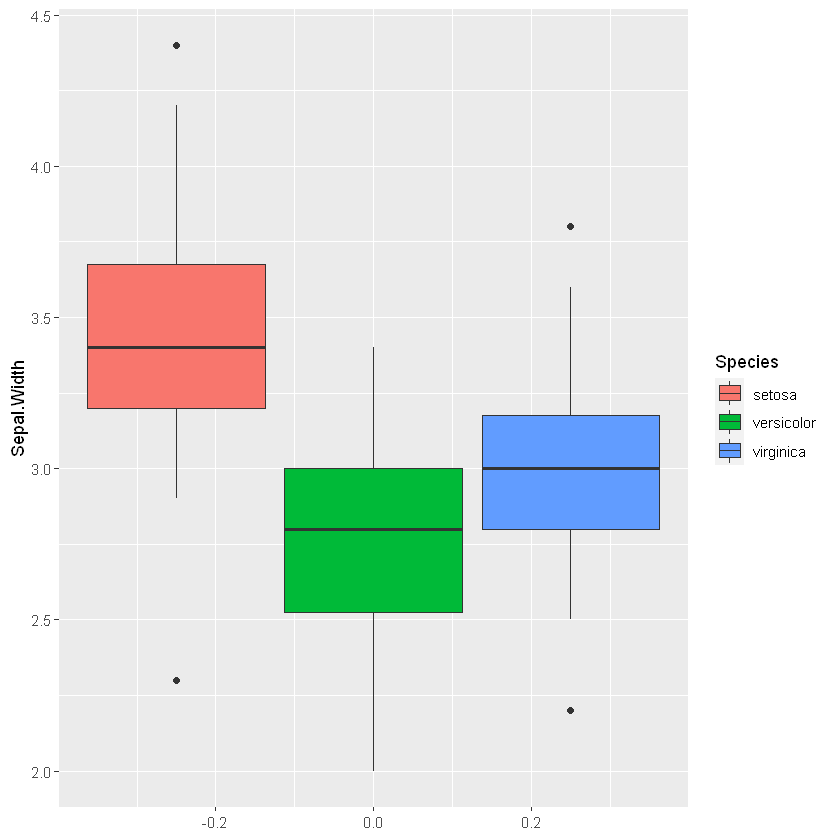

In [6]:
iris %>% ggplot(aes(y = Sepal.Width, fill = Species)) + geom_boxplot()

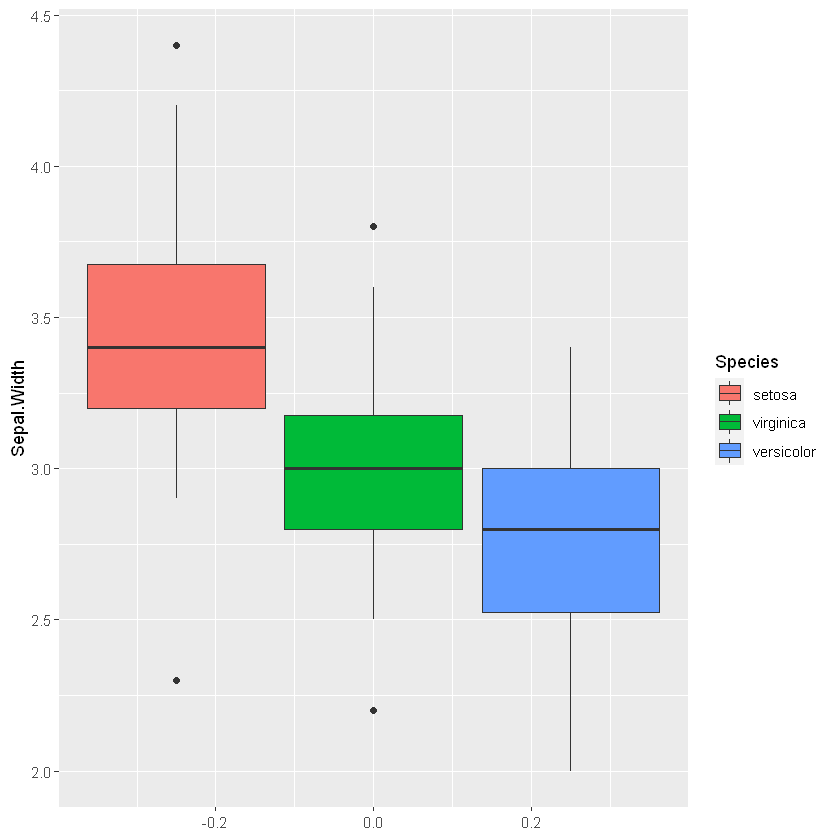

In [9]:
iris %>% ggplot(aes(y = Sepal.Width, fill = fct_reorder(Species, Sepal.Width, .fun = median, .desc = T))) +
geom_boxplot() + labs(fill = 'Species')

In [14]:
df <- tibble::tribble(
  ~color,     ~a, ~b,
  "blue",      1,  2,
  "green",     6,  2,
  "purple",    3,  3,
  "red",       2,  3,
  "yellow",    5,  1
)

df <- df %>% mutate(color = as.factor(color))

df %>% pull(color) %>% levels()

[1] "blue"   "green"  "purple" "red"    "yellow"

In [20]:
df %>% mutate(var = a + b) %>% select(color, var) %>% arrange(var)

color,var
blue,3
red,5
purple,6
yellow,6
green,8


In [18]:
#reorder level by value of a + b

df %>% mutate(color = fct_reorder2(color, a, b, function(x, y) x + y)) %>% pull(color) %>% levels()

[1] "green"  "purple" "yellow" "red"    "blue"